# A Near- Perfect Black Body

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv('./COBE_CMB_data.txt', delimiter = ' ')
data

,frequency (Hz),brightness (ergs/s/cm^2/sr/Hz)
0,3.447358e+10,7.029472e-16
1,4.289696e+10,1.025318e-15
2,5.132233e+10,1.354405e-15
3,6.034453e+10,1.690207e-15
4,6.876791e+10,2.012578e-15
5,7.778013e+10,2.314800e-15
6,8.560070e+10,2.610307e-15
7,9.401010e+10,2.885665e-15
8,1.024075e+11,3.120727e-15
9,1.113938e+11,3.335641e-15


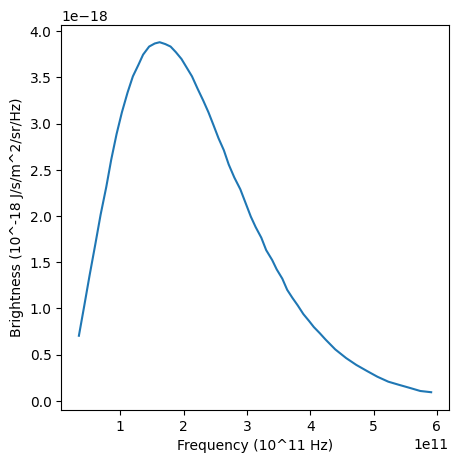

In [4]:
plt.figure(figsize = (5,5))
plt.plot(data['frequency (Hz)'], data['brightness (ergs/s/cm^2/sr/Hz)'] * 1e-3 )
plt.xlabel('Frequency (10^11 Hz)')
plt.ylabel('Brightness (10^-18 J/s/m^2/sr/Hz)')
plt.show()

In [5]:
planck_constant = 6.626e-34
speed_light = 3e8
boltsmann_constant = 1.38e-23

def blackbody_function(v, T):
    return 2* planck_constant * pow(v, 3)/( pow(speed_light, 2) * (np.exp(planck_constant * v/(boltsmann_constant * T)) - 1))


In [6]:
T, covarr = curve_fit(blackbody_function, data['frequency (Hz)'], data['brightness (ergs/s/cm^2/sr/Hz)'] * 1e-3)
T[0]

2.740289273966668

#### The expansion of the Universe has stretched out the CMB radiation by around 1000 times, which makes it look much cooler. So instead of seeing the afterglow at 3000 degrees, we see it at just 3o above absolute zero, or 3 Kelvin (-270$^o$ C).

# Plotting the Galaxy Rotation Curve

In [7]:
import tarfile

with tarfile.open('galaxy_21cm_spectrum.tar.xz') as f:
    f.extractall('./spectral_data')

In [8]:
import os

directory = './spectral_data'

spectral_data = {}
for filename in os.scandir(directory):
    filepath = filename.path
    df = pd.read_csv(filepath, delimiter=' ')
    spectral_data[float(str(filename)[22:-10])] = df
    
print(spectral_data)

{5.11:      wavelngth (cm)  brightness
0         20.958084    2.091941
1         20.958168    4.483908
2         20.958252    0.731278
3         20.958336    8.048551
4         20.958420    1.009468
..              ...         ...
995       21.041664    7.712440
996       21.041748    6.901230
997       21.041832    9.163616
998       21.041916    1.568488
999       21.042000    7.425440

[1000 rows x 2 columns], 5.62:      wavelngth (cm)  brightness
0         20.958084    5.890869
1         20.958168    6.942720
2         20.958252    9.498753
3         20.958336    0.156852
4         20.958420    2.934908
..              ...         ...
995       21.041664    8.019287
996       21.041748    2.603420
997       21.041832    2.694108
998       21.041916    1.221485
999       21.042000    8.528683

[1000 rows x 2 columns], 1.38:      wavelngth (cm)  brightness
0         20.958084    8.247952
1         20.958168    8.697142
2         20.958252    2.938074
3         20.958336    3.424763
4

In [9]:
def gaussian(x, mean, std, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mean) / std)**2)

In [14]:
c = 3e8
rest_freq = 1420.40575177e6

def fit_gaussian(xdata, ydata):
    initial_guess = [np.mean(xdata), np.std(xdata), np.max(xdata)]
    params, covariance = curve_fit(gaussian, xdata, ydata, p0=initial_guess)
    delta_freq = np.abs(-params[0] + rest_freq)
    velocity = delta_freq/rest_freq * c
    return params[0], velocity

In [15]:
velocity = []
central_freq = []
distance_list = []
for key in spectral_data.keys():
    distance_list.append(key)
    freq, vel_data = fit_gaussian(c/spectral_data[key]['wavelngth (cm)'] * 100, spectral_data[key]['brightness'])
    velocity.append(vel_data)
    central_freq.append(freq)
    
print(central_freq)

[1427528625.7079442, 1427504828.3461657, 1428233211.9358246, 1427457230.9618487, 1427569088.12935, 1428404662.1729627, 1427457277.2732794, 1427509670.7970386, 1427571539.081385, 1427485815.201097, 1427999848.463308, 1427519216.100853]


In [16]:
import matplotlib.ticker as ticker

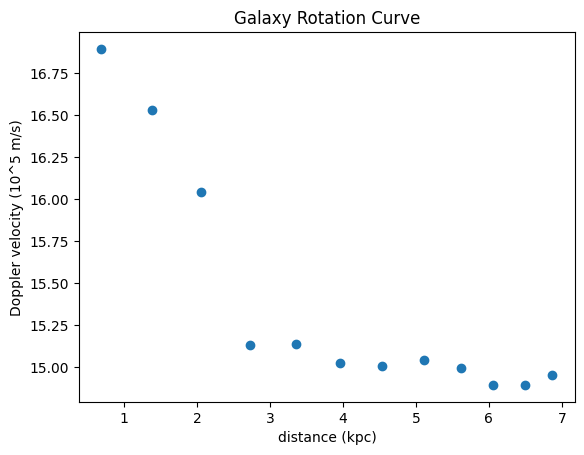

In [17]:
plt.scatter(distance_list, np.array(velocity)/100000)

#def abs_formatter(x, pos):
 #   return f'{abs(x):.2f}'  # Format as absolute value with two decimal places

#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(abs_formatter))
plt.xlabel('distance (kpc)')
plt.ylabel('Doppler velocity (10^5 m/s)')
plt.title('Galaxy Rotation Curve')
plt.show()

When studying other galaxies it is invariably found that the stellar rotational velocity remains constant, or "flat", with increasing distance away from the galactic center. This result is highly counterintuitive since, based on Newton's law of gravity, the rotational velocity would steadily decrease for stars further away from the galactic center. Analogously, inner planets within the Solar System travel more quickly about the Sun than do the outer planets (e.g. the Earth travels around the sun at about 100,000 km/hr while Saturn, which is further out, travels at only one third this speed). One way to speed up the outer planets would be to add more mass to the solar system, between the planets. By the same argument the flat galactic rotation curves seem to suggest that each galaxy is surrounded by significant amounts of dark matter. It has been postulated,and generally accepted, that the dark matter would have to be located in a massive, roughly spherical halo enshrouding each galaxy.